In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from CHAMP.DataLoader import LoadFaceDB
from CHAMP.Monitor import DisplayDico, DisplayConvergenceCHAMP
from CHAMP.CHAMP_Layer import CHAMP_Layer
from CHAMP.CHAMP_Layer import ConvMP
from CHAMP.DataTools import GenerateGabor, Rebuilt
import matplotlib.pyplot as plt

import os
home = os.getenv('HOME')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load the DataBase

In [3]:
path = "../../../Science/These/Rapport d'avancement/database/Face_DataBase/"
#path = home + "/science/VB_These/Rapport d'avancement/database/Face_DataBase/"
training_set = LoadFaceDB(path, nb_batch=1,Decorrelated=True,Normalized=False)

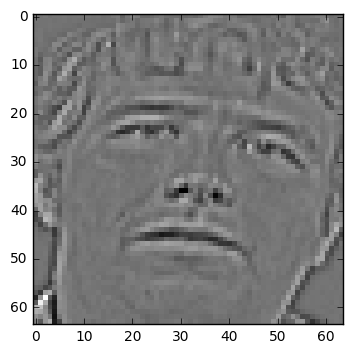

In [4]:
plot = plt.imshow(training_set[0][0,0,0,:,:].numpy(),cmap='gray')

### Generate Filters

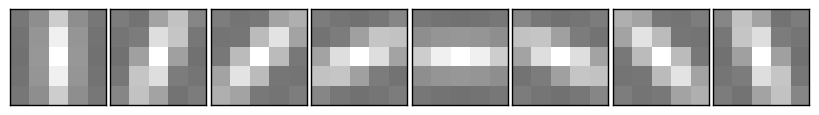

In [5]:
DicoGabor = GenerateGabor(nb_dico=8,dico_size=(5,5),sigma=1,lambd=5,gamma=0.5,psi=0)
DisplayDico(DicoGabor)

### Coding

In [6]:
code = ConvMP(image_input=training_set[0][0,:,:,:,:], dictionary=DicoGabor, l0_sparseness=100,
                modulation=None, verbose=0, train=True, doSym='pos', mask=None,\
                MaskMod='Residual')

In [7]:
reconstructed_image = Rebuilt(training_set[0][0,:,:,:,:],code,DicoGabor)

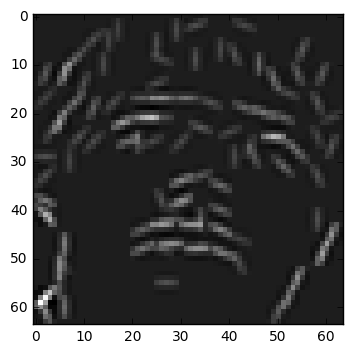

In [8]:
plt.imshow(reconstructed_image[0,0,:,:].numpy(),cmap='gray')

In [9]:
residual=training_set[0][0,:,:,:,:]-reconstructed_image

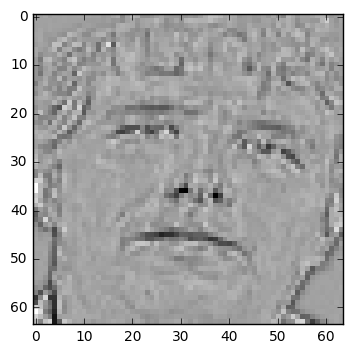

In [10]:
plt.imshow(residual[0,0,:,:].numpy(),cmap='gray')

### Classifying